Compare two algorithms: Weighted Moving Average (selecting weights based on a Gaussian function)
and Exponential Moving Average. Using these algorithms, demonstrate the extraction of regular signal
components (trends, periodicity or quasi-periodicity, etc.) in a signal, the possibilities of reducing existing
or artificially added noises and possible failures. Also compare the results obtained by computing with
different algorithm parameters 𝐾 and 𝐿 (in the case of weighted moving averaging) and 𝛼 (in the case of
exponential moving averaging). In your Report, provide a complete analysis (consisting of all the above
mentioned studies) for only one selected signal (for which you consider the most representative results),
For other signals studied, the Report may not include illustrations of all the studies (however, you may be
asked to demonstrate the operation of the omitted studies on a computer screen during the discussion).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


datasets:

    - data1 - SP500 daily values from 2014 to 2024 https://fred.stlouisfed.org/series/SP500

    - data2 - Unemployment rates from 1948 to 2024 https://fred.stlouisfed.org/series/UNRATE 

    - data3 - US GDP quarterly from 1947 to 2024 https://fred.stlouisfed.org/series/GDP

    - data4 - Average sales price for houses https://fred.stlouisfed.org/series/ASPUS
    
    - data5 - personal saving rate https://fred.stlouisfed.org/series/PSAVERT

In [3]:
df = pd.read_csv('data1.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df['SP500'] = pd.to_numeric(df['SP500'], errors='coerce')
df.dropna(inplace=True)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 0 to 2608
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    2517 non-null   datetime64[ns]
 1   SP500   2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


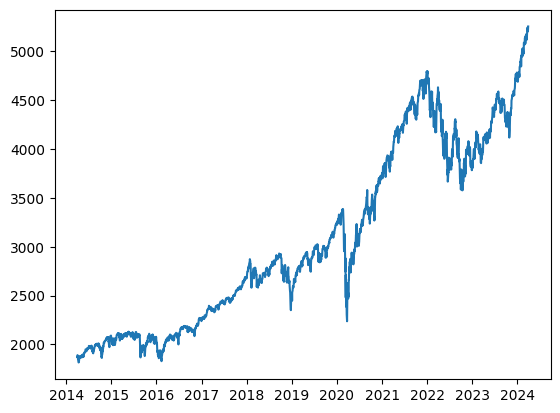

In [5]:
plt.plot(df['DATE'],df['SP500'])

In [6]:
#df_filtered = df[df['DATE'].dt.year.isin([2020])]
df_filtered = df

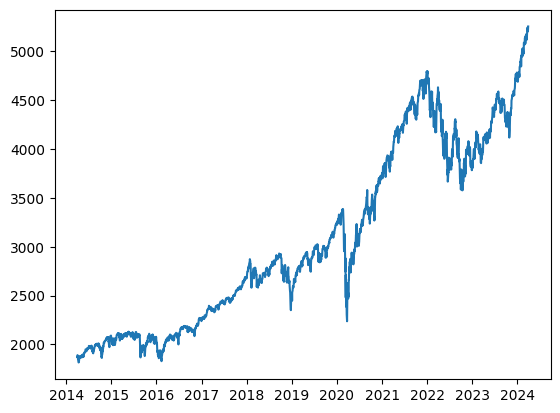

In [7]:
plt.plot(df_filtered['DATE'],df_filtered['SP500'])

In [8]:
# Weighted moving average 
###############################
#PARAMETERS

L = 50 # L > 1 parametras nusako kiek kartu krastines vertes mazesnes uz vidurine
K = 30 # K > 1 parametras nusako kiek verciu papuola i vidurkinimo apimti is abieju krastu
N = len(df)

In [9]:
    
def gaussian_distribution(x):
    return 1/(np.sqrt(2*np.pi)) * np.exp(-((x**2)/2))      
        
        
def get_weights(L,K):
    
    #boundary value for weights
    x_k = np.sqrt(2*np.log(L))
    
    #creating X axis for gaussian weight distribution
    K_j = np.linspace(-K,K,2*K+1)
    
    
    #distributing weights along X axis
    x_j = [x_k * j/K for j in K_j]
    
    # applying gaussian distribution to weights
    p_j = [gaussian_distribution(x) for x in x_j]
    
    #normalization of weights
    w_j = [p/sum(p_j) for p in p_j]
    return K_j,w_j
        
        
K_j,weights = get_weights(L,K)

def plot_weights(K_j,weights):
    # Plot the marker point
    plt.plot(K_j, weights, 'o', color='red',markersize=7,markeredgecolor='black')

    # Draw a line from the marker point to the x-axis

    for i in range(len(K_j)):
        plt.plot([K_j[i], K_j[i]], [weights[i], 0], color='black', linestyle='--', linewidth=0.5)

    # Show the plot
    plt.ylim(0,max(weights)+min(weights))
    plt.show()
    return None

def apply_weights(data, weights):
    weighted_data = 0
    #print(len(data),len(weights))
    for i in range(len(data)):
        weighted_data += data[i] * weights[i]
    return weighted_data

def weighted_moving_average(data, L, K):
    
    K_j,weights = get_weights(L,K)
    plot_weights(K_j,weights)
    weighted_data = np.zeros(len(data))
    
    for i in range(K, len(data) - K):
        window_data = data[i - K : i + K + 1]
        weighted_data[i] = apply_weights(window_data, weights)
    
    weighted_data = np.where(weighted_data == 0, np.nan, weighted_data)
    
    return weighted_data

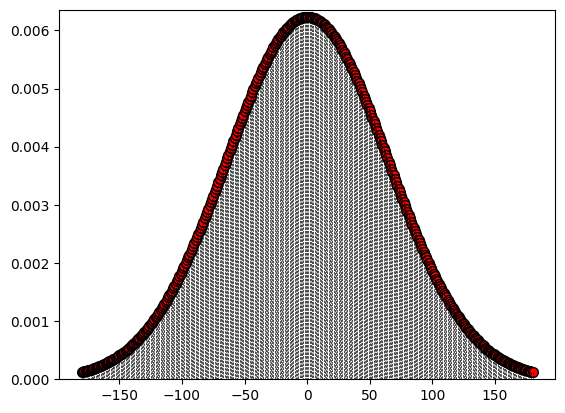

In [10]:
df_filtered['weighted_moving_average'] = weighted_moving_average(df_filtered['SP500'].values, L = 50, K = 180)
df_filtered['weighted_moving_average'] = df_filtered['weighted_moving_average'].replace(0, np.nan)

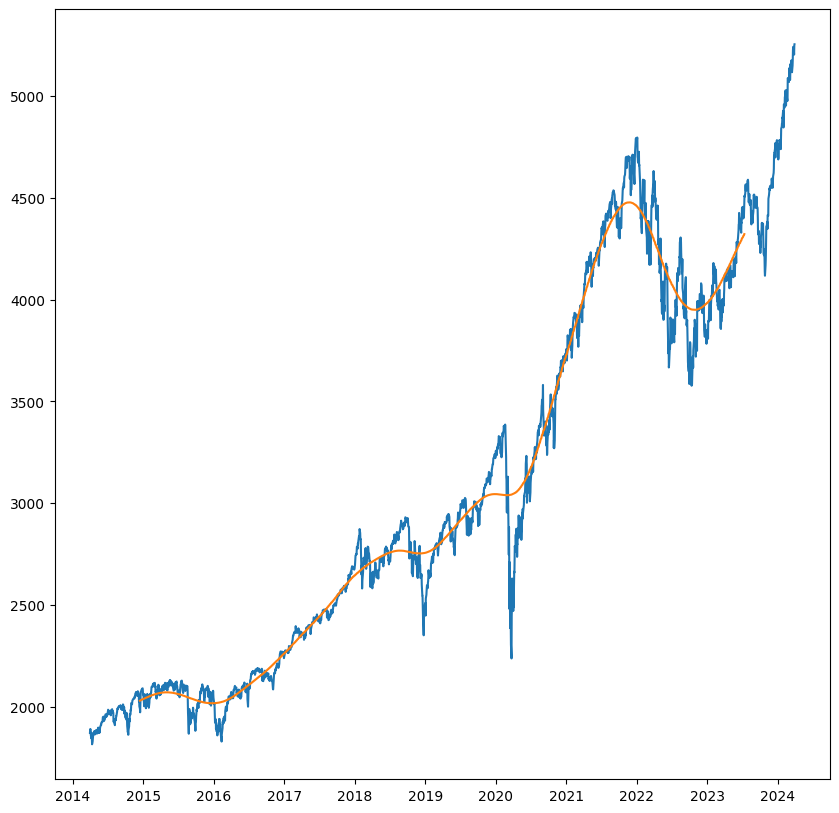

In [11]:
plt.figure(figsize=(10, 10))  # Set the figure size to 10 inches by 6 inches

plt.plot(df_filtered['DATE'],df_filtered['SP500'])
plt.plot(df_filtered['DATE'], df_filtered['weighted_moving_average'])
plt.show()


In [12]:
def get_residuals(data, weighted_data):
    residuals = abs(data - weighted_data)
    return residuals

In [13]:
def exponential_moving_average(data, alpha):
    averaged_data = np.zeros(len(data))
    averaged_data[0] = data[0]
    
    for i in range(1, len(data)):
        averaged_data[i] = alpha * data[i] + (1 - alpha) * averaged_data[i - 1]
        
    return averaged_data

In [14]:
df_filtered['exponential_moving_average'] = exponential_moving_average(df_filtered['SP500'].values, alpha = 0.01)

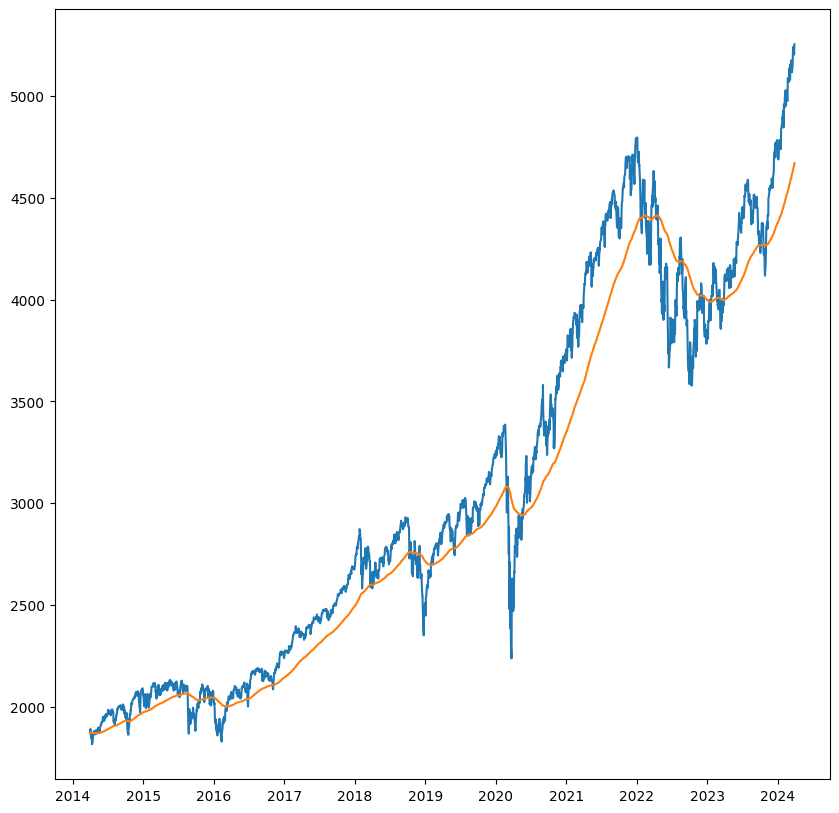

In [15]:
plt.figure(figsize=(10, 10))  # Set the figure size to 10 inches by 6 inches
plt.plot(df_filtered['DATE'], df_filtered['SP500'])
plt.plot(df_filtered['DATE'], df_filtered['exponential_moving_average'])
plt.show()

In [52]:
df1 = pd.read_csv('data2.csv')
df1['DATE'] = pd.to_datetime(df1['DATE'])

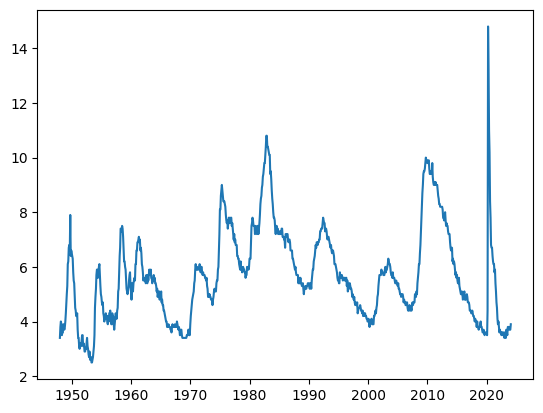

In [53]:
plt.plot(df1['DATE'],df1['UNRATE'])

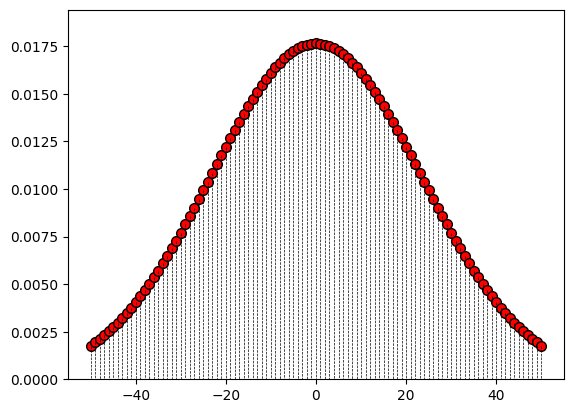

In [54]:
df1['weighted_moving_average'] = weighted_moving_average(df1['UNRATE'].values, L = 10, K = 50)

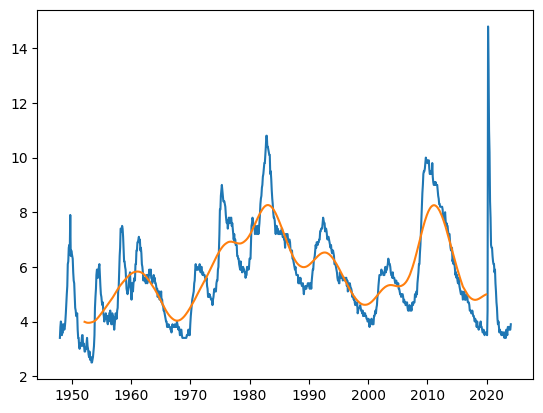

In [59]:
plt.plot(df1['DATE'],df1['UNRATE'])
plt.plot(df1['DATE'], df1['weighted_moving_average'])

In [55]:
df1['exponential_moving_average'] = exponential_moving_average(df1['UNRATE'].values, 0.01)

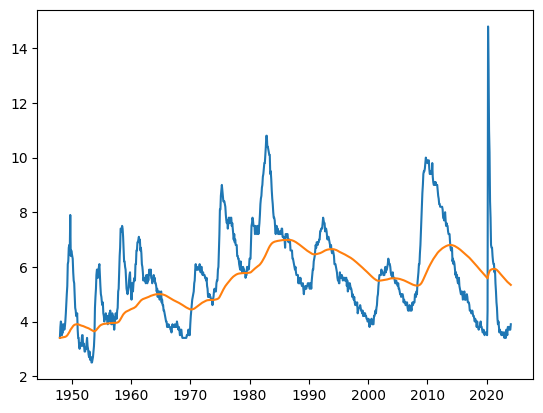

In [60]:
plt.plot(df1['DATE'], df1['UNRATE'])
plt.plot(df1['DATE'], df1['exponential_moving_average'])

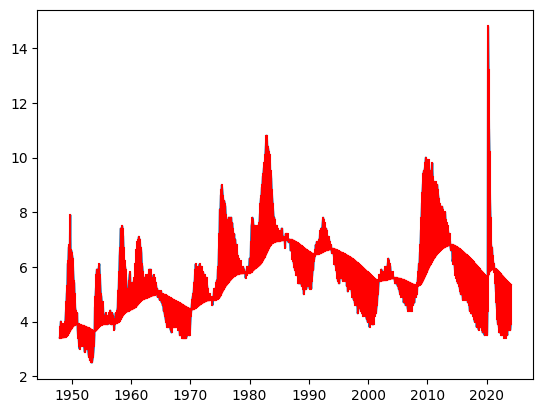

In [58]:
plt.plot(df1['DATE'],df1['UNRATE'])
plt.plot(df1['DATE'], df1['exponential_moving_average'],color='red')
df1['residuals'] = get_residuals(df1['UNRATE'].values, df1['exponential_moving_average'].values)

plt.plot([df1['DATE'],df1['DATE']], [df1['UNRATE'],df1['exponential_moving_average']],color='red')

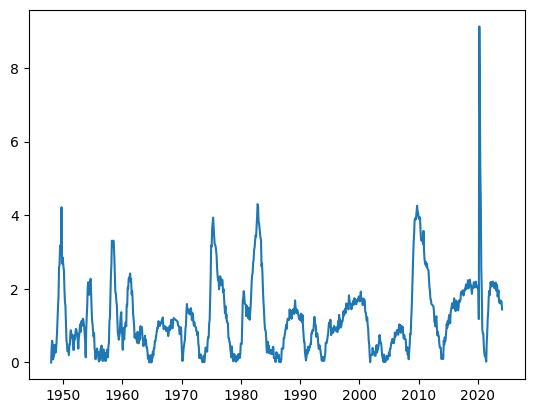

In [61]:
plt.plot(df1['DATE'],df1['residuals'])

Reportui:

Pasiaiskinti del kintamo alpha taikymo

gradiento variacija - kiek algoritmas paauga per iteracijas 

palyginti wma ir ema pagal trendu islaikyma